## Stage08: Exploratory Data Analysis

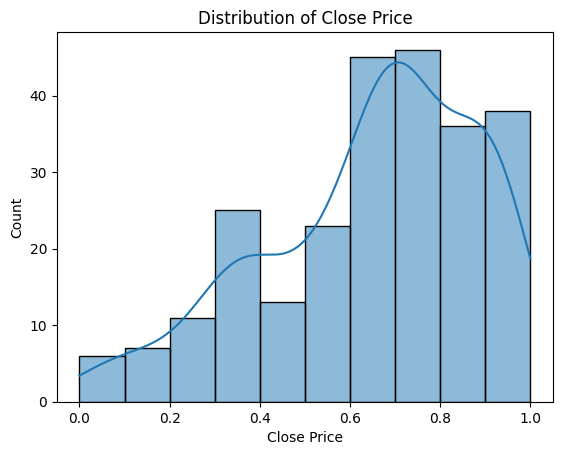

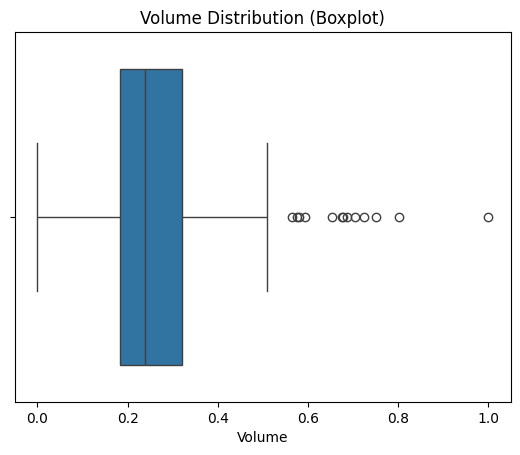

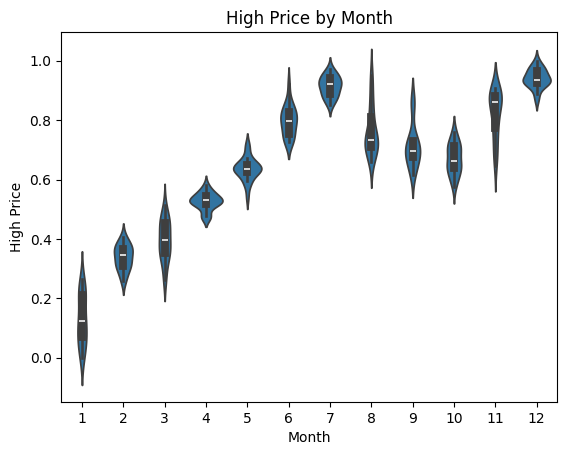

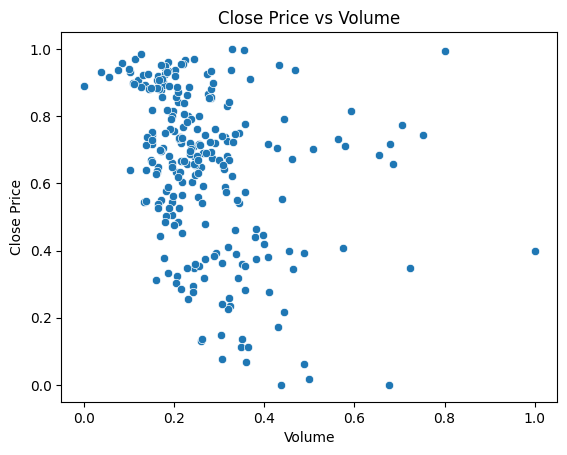

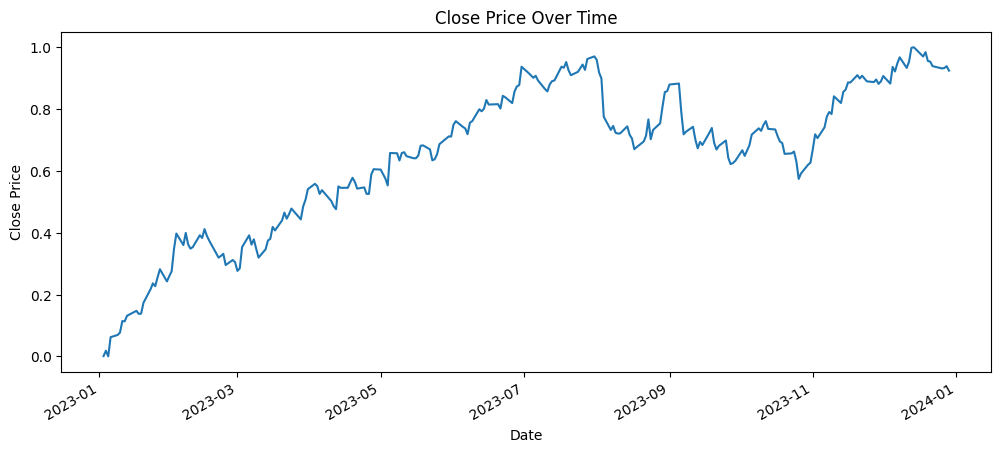

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('../data/processed/aapl_2023_cleaned.csv', index_col='date', parse_dates=['date'])

# Distribution: Close price
sns.histplot(df['Close'], kde=True)
plt.title('Distribution of Close Price')
plt.xlabel('Close Price')
plt.ylabel('Count')
plt.show()

# Boxplot: Volume
sns.boxplot(x=df['Volume'])
plt.title('Volume Distribution (Boxplot)')
plt.xlabel('Volume')
plt.show()

# Violin plot: High by month
df['month'] = df.index.month
sns.violinplot(x='month', y='High', data=df)
plt.title('High Price by Month')
plt.xlabel('Month')
plt.ylabel('High Price')
plt.show()

# Relationship: Close vs Volume
sns.scatterplot(x='Volume', y='Close', data=df)
plt.title('Close Price vs Volume')
plt.xlabel('Volume')
plt.ylabel('Close Price')
plt.show()

# Line plot: Close price over time
df['Close'].plot(figsize=(12,5), title='Close Price Over Time')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.show()

#### Distribution of Close Price
The histogram shows right-skew and some outliers in close price.

#### Volume Distribution (Boxplot)
Boxplot reveals several high-volume outliers, likely on earnings or news days.

#### High Price by Month (Violin Plot)
Seasonal structure is weak, but some months show higher price dispersion.

#### Close Price vs Volume
No strong linear relationship, but some high-volume days correspond to price jumps.

#### Close Price Over Time
Shows periods of trend and volatility, with no strong seasonality.

**Implications for next step:**  
- Outliers in volume and price should be considered for capping or removal.
- Rolling averages and volatility features may help capture trend and risk.
- No strong seasonality, so time-based features may be less important.

#### More Relationship Plots
#### High vs. Close
There is a very strong linear relationship between High and Close, as both are determined by the same trading session. This is confirmed by the high correlation coefficient (see heatmap).

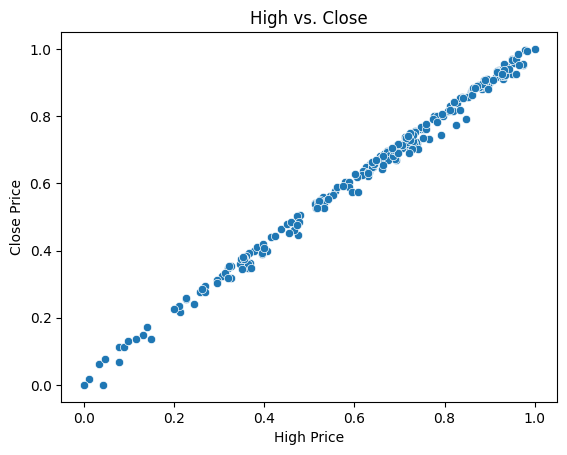

In [3]:
sns.scatterplot(x='High', y='Close', data=df)
plt.title('High vs. Close')
plt.xlabel('High Price')
plt.ylabel('Close Price')
plt.show()

#### Open vs. Next Day Close
The relationship between today's open and the next day's close is weaker, suggesting that overnight information and new trading sessions introduce additional variability.

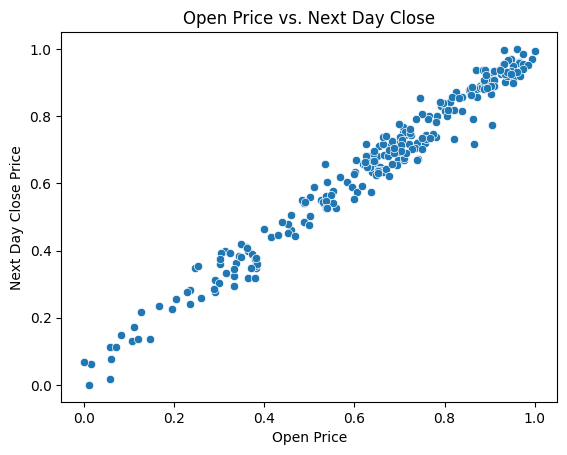

In [6]:
df['close_next'] = df['Close'].shift(-1)

df = df.dropna(subset=['close_next'])
sns.scatterplot(x='Open', y='close_next', data=df)
plt.title('Open Price vs. Next Day Close')
plt.xlabel('Open Price')
plt.ylabel('Next Day Close Price')
plt.show()

### Quantitative EDA Insights

- **High and Close** are almost perfectly correlated, so including both in a model may be redundant.
- **Open and next day's Close** have a low correlation, indicating limited predictive power for overnight price changes.

These findings guide feature selection and engineering for modeling, ensuring we avoid multicollinearity and focus on the most informative predictors.